**<font size=48>Machine Learning</font>**<br>

Lab06 - Principal Component Analysis (PCA) From Scratch

Objectives:
- Learn how to implement PCA from scratch.

This lab is by YP Wong [<yp@ypwong.net>](mailto:yp@ypwong.net).


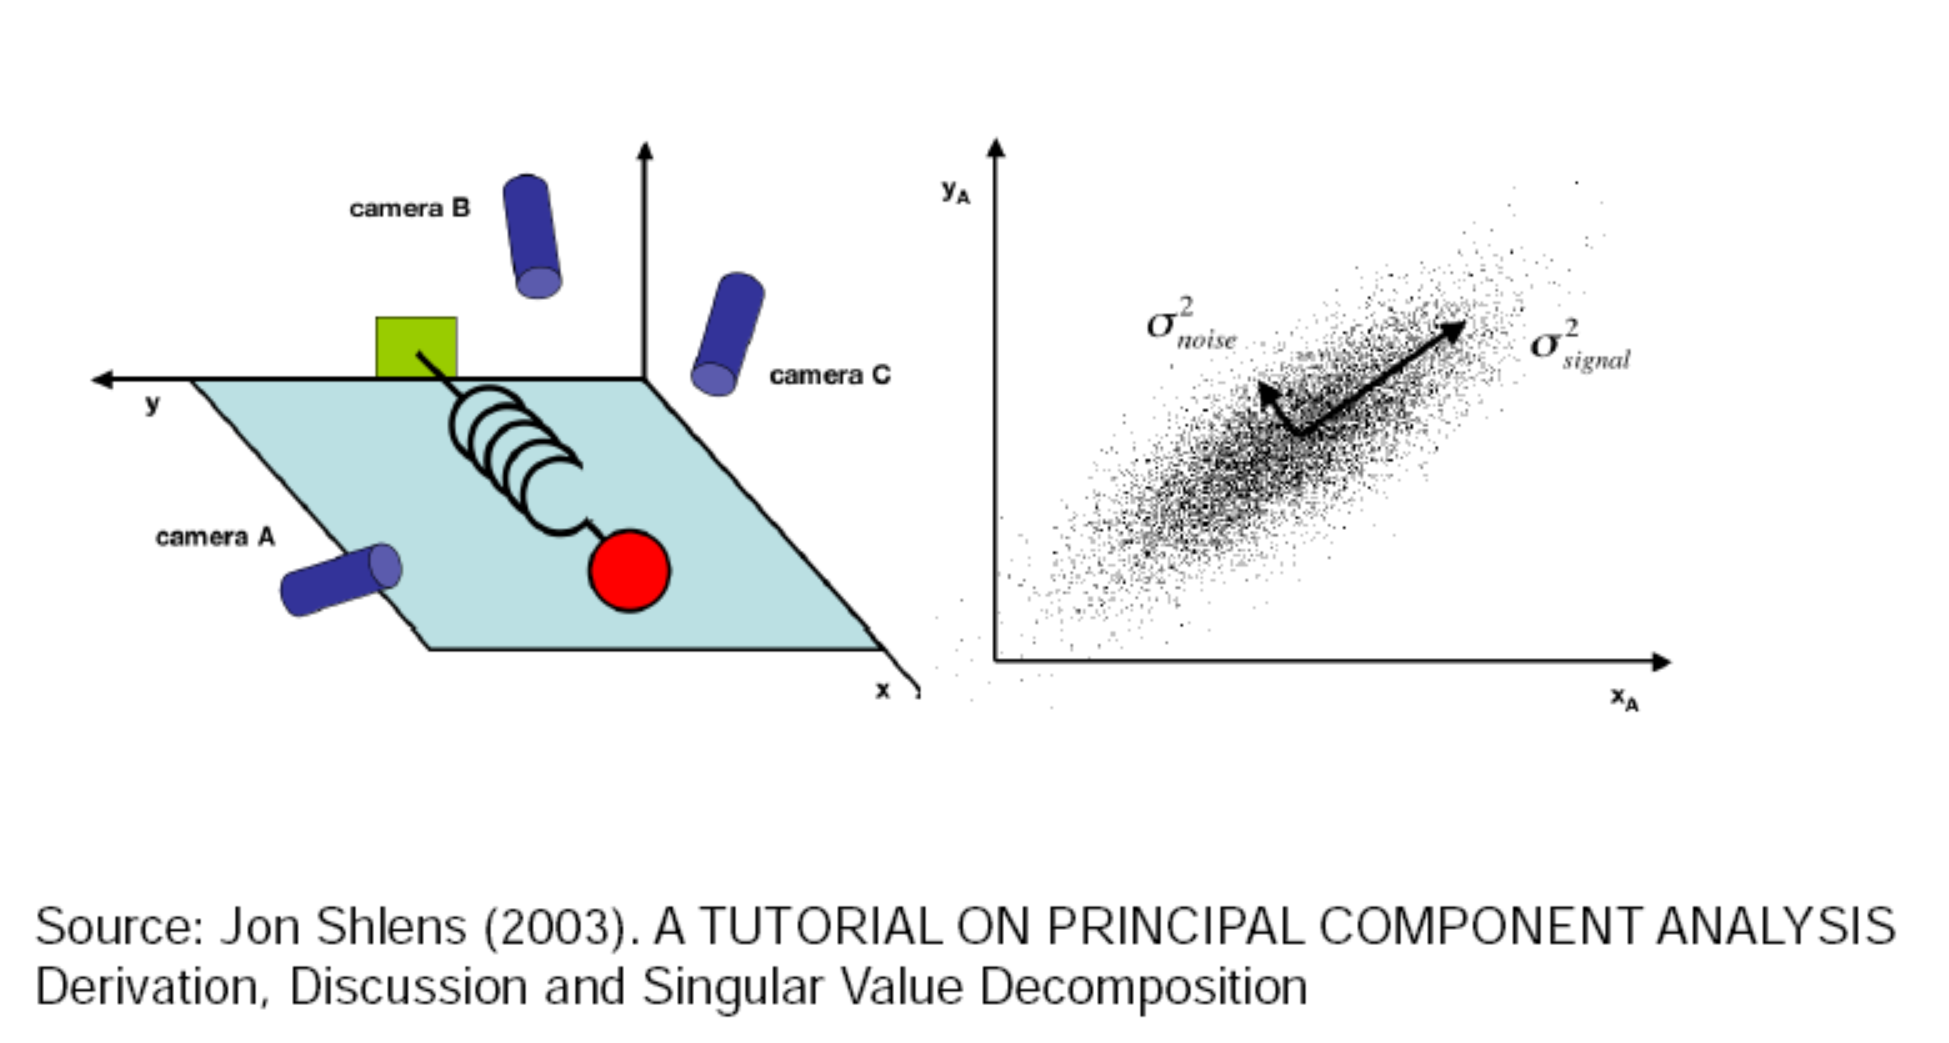

## Mount Google Drive

In [1]:
# # This is needed if you need to read data from your Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# import os

# # Change the path to where you run the Jupyter Notebook from.
# notebook_path = r"/content/drive/MyDrive/Colab Notebooks"

# import os
# os.chdir(notebook_path)
# !pwd

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install latexify-py==0.3.1

import latexify

latexify.__version__

from IPython.display import display, Latex

def array_to_latex(X, precision = 8, suppress_small = True):
  latex_code = np.array2string(X, precision = precision,
                               separator=' & ',
                               suppress_small = suppress_small)
  latex_code = latex_code.replace("[", "\\begin{bmatrix}\n ", 1)
  latex_code = latex_code.rsplit("]", 1)
  latex_code = "\n\\end{bmatrix}".join(latex_code)

  latex_code = latex_code.replace("[", "")
  latex_code = latex_code.replace("] &", r" \\")
  latex_code = latex_code.replace("]", "")

  return latex_code

def print_latex(latex):
  display(Latex(latex))

def println_latex(latex):
  display(Latex(latex))
  print()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.0 MB/s eta 0:00:00


In [4]:
# Examples on how to use the array_to_latex() function
test_array1 = np.array([[1, 2, 3, 4]])
test_array2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12] ])

latex1 = "x = " + array_to_latex(test_array1)
latex2 = "$$ \\mathbf{X} = " + array_to_latex(test_array2) + "$$"
println_latex(latex1)
println_latex(latex2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## <font color='lightblue'>The Raw Data</font>

In [5]:
X = np.array([ [ 1.1,  3.0],
               [ 2.3,  1.5],
               [ 2.9,  3.5],
               [ 4.4,  5.5],
               [ 4.8,  6.5],
               [ 6.1,  7.0],
               [ 6.8,  8.5],
               [ 8.1,  7.5],
               [ 8.9,  9.5],
               [10.0, 10.0]
              ])

print("X =", X)

num_points = X.shape[0]

X_bar = np.mean(X, axis = 0)
print("xbar =>", X_bar)

X = [[ 1.1  3. ]
 [ 2.3  1.5]
 [ 2.9  3.5]
 [ 4.4  5.5]
 [ 4.8  6.5]
 [ 6.1  7. ]
 [ 6.8  8.5]
 [ 8.1  7.5]
 [ 8.9  9.5]
 [10.  10. ]]
xbar => [5.54 6.25]


In [6]:
# Code to generate LaTeX output

latex1 = r"""
\text{Let $\mathbf{X}$ be a $m \times n$ matrix:}
"""
println_latex(latex1)

latex1 = r"""
\mathbf{X} =
  \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1n} \\
    x_{21} & x_{22} & \cdots & x_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & \cdots & x_{mn}
  \end{bmatrix}
"""
println_latex("$$" + latex1 + "$$")

latex1 = r"""
\text{where $m$ is the data size (number of points = number of observations) and $n$ is the data dimension (number of features).}
"""
println_latex(latex1)

latex1 = r"""
\text{For our example here below, $m = 10$ and $n = 2$. The data mastrix $\mathbf{X}$:}
"""
println_latex(latex1)

latex1 = r"""
\mathbf{X} = \begin{bmatrix}
X_1^{(1)} & X_2^{(1)} \\
X_1^{(2)} & X_2^{(2)} \\
X_1^{(3)} & X_2^{(3)} \\
X_1^{(4)} & X_2^{(4)} \\
X_1^{(5)} & X_2^{(5)} \\
X_1^{(6)} & X_2^{(6)} \\
X_1^{(7)} & X_2^{(7)} \\
X_1^{(8)} & X_2^{(8)} \\
X_1^{(9)} & X_2^{(9)} \\
X_1^{(10)} & X_2^{(10)}
\end{bmatrix} = """
latex1 += array_to_latex(X)
println_latex("$$" + latex1 + "$$")

latex1 = r"""
\text{The mean vector of $\mathbf{X}$:}
"""
println_latex(latex1)

latex1 = r"""
\mathbf{\bar{X}} =
\begin{bmatrix}
\sum_i^{10}{X_1^{(i)}} &  \sum_i^{10}{X_2^{(i)}}
\end{bmatrix}^T
=
\begin{bmatrix}
\bar{X_1} & \bar{X_2}
\end{bmatrix}^T
= """
latex1 += array_to_latex(X_bar) + "^T"
println_latex("$$" + latex1 + "$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## <font color='lightblue'>The Transformed Zero-Centred (or Mean-Centred) Data</font>

In [7]:
X_tilde = X - X_bar
print("XTilde =", X_tilde)

XTilde = [[-4.44 -3.25]
 [-3.24 -4.75]
 [-2.64 -2.75]
 [-1.14 -0.75]
 [-0.74  0.25]
 [ 0.56  0.75]
 [ 1.26  2.25]
 [ 2.56  1.25]
 [ 3.36  3.25]
 [ 4.46  3.75]]


In [8]:
# Code to generate LaTeX output

latex1 = r"""
\mathbf{\widetilde{X}} =
\begin{bmatrix}
X_1^{(1)} & X_2^{(1)} \\
X_1^{(2)} & X_2^{(2)} \\
X_1^{(3)} & X_2^{(3)} \\
X_1^{(4)} & X_2^{(4)} \\
X_1^{(5)} & X_2^{(5)} \\
X_1^{(6)} & X_2^{(6)} \\
X_1^{(7)} & X_2^{(7)} \\
X_1^{(8)} & X_2^{(8)} \\
X_1^{(9)} & X_2^{(9)} \\
X_1^{(10)} & X_2^{(10)}
\end{bmatrix}
-
\begin{bmatrix}
\bar{X_1} & \bar{X_2} \\
\bar{X_1} & \bar{X_2} \\
\bar{X_1} & \bar{X_2} \\
\bar{X_1} & \bar{X_2} \\
\bar{X_1} & \bar{X_2} \\
\bar{X_1} & \bar{X_2} \\
\bar{X_1} & \bar{X_2} \\
\bar{X_1} & \bar{X_2} \\
\bar{X_1} & \bar{X_2} \\
\bar{X_1} & \bar{X_2}
\end{bmatrix}
= """

latex1 += array_to_latex(X) + "-"

latex1 += array_to_latex(np.tile(X_bar, (10, 1))) + "="

latex1 += array_to_latex(X_tilde)

println_latex("$$" + latex1 + "$$")

<IPython.core.display.Latex object>

In [9]:
def plot_points(x, y, title, xlabel, ylabel, color = "darkblue", label_fontsize = 12):
  plt.scatter(x, y, color = color)
  plt.title(title)
  if np.min(x) <= 0 and np.max(x) >= 0:
    plt.axvline(x = 0, color='black', linestyle='--')
  if np.min(y) <= 0 and np.max(y) >= 0:
    plt.axhline(y = 0, color='black', linestyle='--')
  plt.xlabel(xlabel, fontsize = label_fontsize)
  plt.ylabel(ylabel, fontsize = label_fontsize)

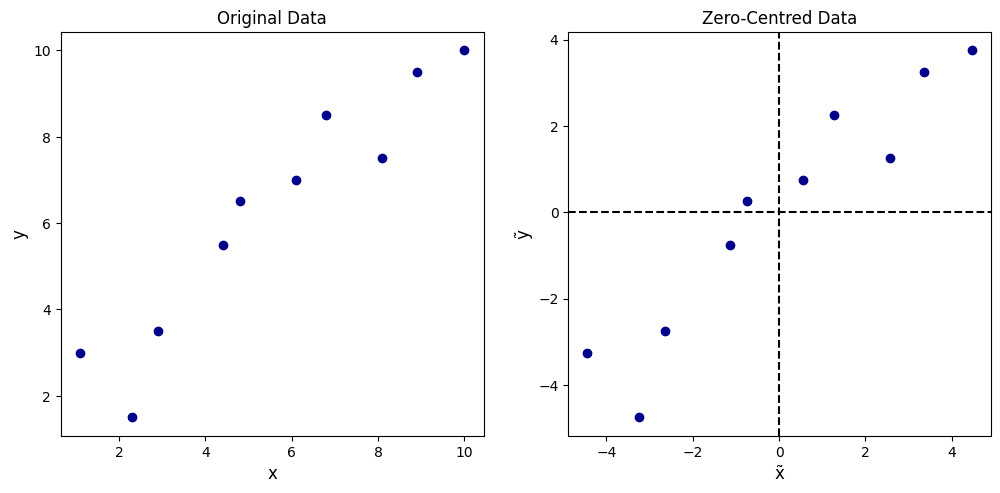

In [10]:
x, y = X[:, 0], X[:, 1]
x_tilde, y_tilde = X_tilde[:, 0], X_tilde[:, 1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1, aspect='equal')
plot_points(x, y, title = "Original Data",
            xlabel = "x", ylabel = "y")

plt.subplot(1, 2, 2, aspect='equal')
plot_points(x_tilde, y_tilde, title = "Zero-Centred Data",
            xlabel = "x\u0303", ylabel = "y\u0303")

plt.show()

## <font color='lightblue'>Principal Components</font>

Compute the **Covariance Matrix** (**Variance-Covariance Matrix**) $\mathbf{C}$:
\begin{equation*}
\mathbf{C} = \frac{1}{m-1} \mathbf{\widetilde{X}}^T \mathbf{\widetilde{X}},
\ \ \ \text{m = number of points}
\end{equation*}


The **Principal Components** are the eigenvectors $\mathbf{v_i}$ given by:  
\begin{equation*}
\mathbf{C} \mathbf{v_i} = \lambda \mathbf{v_i}
\end{equation*}
where $\mathbf{\lambda_i}$s are the corresponding eigenvalues, for $i = 1, \ldots, m$


### <font color='lightcyan'>Compute Covariance Matrix (Variance-Covariance Matrix)</font>

In [11]:
C = X_tilde.T @ X_tilde / (X_tilde.shape[0] - 1)
print(C)
print()

[[8.74044444 7.98333333]
 [7.98333333 8.125     ]]



In [12]:
# Code to generate LaTeX output

latex1 = r"""
\mathbf{C} = \frac{1}{m-1} \mathbf{\widetilde{X}}^T \mathbf{\widetilde{X}},
\ \ \ \text{m = number of points}
"""
println_latex("$$" + latex1 + "$$")

latex1  = "\mathbf{C} = \\frac{1}{%s}" % str(X_tilde.shape[0] - 1)
latex1 += array_to_latex(X_tilde.T)
latex1 += array_to_latex(X_tilde)
println_latex("$$" + latex1 + "$$")

latex1  = "\mathbf{C} = " + array_to_latex(C)
println_latex("$$" + latex1 + "$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### <font color='lightcyan'>Solve the Characteristic Equation to Find the Eigenvalues</font>

NOTE: In practise, we will never compute the eigenvalues using the characteristic equations as it is computational expensive to compute for dimension more than 2. Nevertheless, we are showing how this can be done for this 2D example.

In [13]:
# Code to generate LaTeX output
latex1 = r"""
\mathbf{C} \mathbf{v} = \lambda \mathbf{v}
"""
println_latex("$$" + latex1 + "$$")

latex1 = r"(\mathbf{C} - \lambda \mathbf{I} ) \mathbf{v} = \mathbf{0}"
println_latex("$$" + latex1 + "$$")

latex1 = r"\text{For $\mathbf{v}$ to be non-zero,}"
println_latex(latex1)

latex1 = r"\text{det}(\mathbf{C} - \lambda \mathbf{I}) = 0"
println_latex("$$" + latex1 + "$$")

latex1 = r"\text{Thus,}"
println_latex(latex1)

latex1  = "\\text{det}(\\begin{bmatrix}\n"
latex1 += "%.8f - \\lambda & %.8f \\\\" % (C[0,0], C[0,1])
latex1 += "%.8f            & %.8f - \\lambda \\\\" % (C[1,0], C[1,1])
latex1 += "\n\\end{bmatrix}) = 0"
println_latex("$$" + latex1 + "$$")

latex1  = "(%.8f - \\lambda)(%.8f - \\lambda)" % (C[0,0], C[1,1])
latex1 += "-(%.8f)(%.8f) = 0" % (C[0,1], C[1,0])
println_latex("$$" + latex1 + "$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
a = 1
b = - C[0,0] - C[1,1]
c = C[0,0] * C[1,1] - C[0,1] * C[1,0]
print(a, b, c)

1 -16.865444444444442 7.282500000000006


In [15]:
# Code to generate LaTeX output

latex1 = "(%.8f)*\\lambda^2 + (%.8f)*\\lambda + (%.8f) = 0" % (a, b, c)
println_latex("$$" + latex1 + "$$")

<IPython.core.display.Latex object>

In [16]:
discriminant = b**2 - 4*a*c
lambda1 = (-b + np.sqrt(discriminant)) / (2*a)
lambda2 = (-b - np.sqrt(discriminant)) / (2*a)
print("lambda1 =", lambda1)
print("lambda2 =", lambda2)

eigenvalues = np.array([lambda1, lambda2])
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
lambda1 = eigenvalues[0]
lambda2 = eigenvalues[1]
print("lambda1 =", lambda1)
print("lambda2 =", lambda2)

lambda1 = 16.421984020233378
lambda2 = 0.4434604242110636
lambda1 = 16.421984020233378
lambda2 = 0.4434604242110636


In [17]:
# Code to generate LaTeX output

latex1 = "\\lambda = \\frac{-(%.8f) \\pm \\sqrt{%.8f^2 - 4(%.8f)(%.8f)}}{2(%.8f)}" % (b, b, a, c, a)
println_latex("$$" + latex1 + "$$")

latex1 = "\\lambda_1 = %.8f, \ \ \\lambda_2 = %.8f " % (lambda1, lambda2)
println_latex("$$" + latex1 + "$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### <font color='lightcyan'>Solve for the Corresponding Eigenvectors</font>

In [18]:
# Code to generate LaTeX output

latex1  = "(\mathbf{C} - \\lambda_i \mathbf{I})\mathbf{v_i} = \mathbf{0}"
println_latex("$$" + latex1 + "$$")

latex1  = "\\begin{bmatrix}\n"
latex1 += "%.8f - \\lambda_i & %.8f \\\\" % (C[0,0], C[0,1])
latex1 += "%.8f              & %.8f - \\lambda_i \\\\\n" % (C[1,0], C[1,1])
latex1 += "\\end{bmatrix}\n"
latex1 += "\\begin{bmatrix} x_i \\\\ y_i \\end{bmatrix}\n"
latex1 += " = \\begin{bmatrix} 0 \\\\ 0 \\end{bmatrix}"
println_latex("$$" + latex1 + "$$")

latex1  = "\\text{For $\\lambda_1 = %.8f$,}" % lambda1
println_latex(latex1)

latex1  = "$$ \\begin{bmatrix}\n"
latex1 += "%.8f - %.8f & %.8f \\\\" % (C[0,0], lambda1, C[0,1])
latex1 += "%.8f        & %.8f - %.8f \\\\" % (C[1,0], C[1,1], lambda1)
latex1 += "\\end{bmatrix}\n"
latex1 += "\\begin{bmatrix} x_1 \\\\ y_1 \\end{bmatrix}\n"
latex1 += " = \\begin{bmatrix} 0 \\\\ 0 \\end{bmatrix} $$"
println_latex(latex1)

latex1  = "\\begin{bmatrix}\n"
latex1 += "%.8f & %.8f \\\\" % (C[0,0] - lambda1, C[0,1])
latex1 += "%.8f & %.8f \\\\" % (C[1,0], C[1,1] - lambda1)
latex1 += "\\end{bmatrix}\n"
latex1 += "\\begin{bmatrix} x_1 \\\\ y_1 \\end{bmatrix}\n"
latex1 += " = \\begin{bmatrix} 0 \\\\ 0 \\end{bmatrix}"
println_latex("$$" + latex1 + "$$")

latex1  = "\\text{For $\\lambda_2 = %.8f$,}" % lambda2
println_latex(latex1)

latex1  = "$$ \\begin{bmatrix}\n"
latex1 += "%.8f - %.8f & %.8f \\\\" % (C[0,0], lambda2, C[0,1])
latex1 += "%.8f        & %.8f - %.8f \\\\" % (C[1,0], C[1,1], lambda2)
latex1 += "\\end{bmatrix}\n"
latex1 += "\\begin{bmatrix} x_2 \\\\ y_2 \\end{bmatrix}\n"
latex1 += " = \\begin{bmatrix} 0 \\\\ 0 \\end{bmatrix} $$"
println_latex(latex1)

latex1  = "\\begin{bmatrix}\n"
latex1 += "%.8f & %.8f \\\\" % (C[0,0] - lambda2, C[0,1])
latex1 += "%.8f & %.8f \\\\" % (C[1,0], C[1,1] - lambda2)
latex1 += "\\end{bmatrix}\n"
latex1 += "\\begin{bmatrix} x_2 \\\\ y_2 \\end{bmatrix}\n"
latex1 += " = \\begin{bmatrix} 0 \\\\ 0 \\end{bmatrix}"
println_latex("$$" + latex1 + "$$")


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [19]:
def get_2dvector_length(v):
  return np.sqrt(v[0]**2 + v[1]**2)

pc1 = np.array([1, None])
pc1[1] = -(C[0,0] - lambda1) / C[0,1]
pc1 = pc1 / get_2dvector_length(pc1)
print(pc1)

pc2 = np.array([None, 1])
pc2[0] = -C[0,1] / (C[0,0] - lambda2)
pc2 = pc2 / get_2dvector_length(pc2)
print(pc2)

print("%.8f" % np.dot(pc1, pc2))    # expected to be zerp

VT = np.array([pc1, pc2])
print(VT)

V = VT.T
print(V)

[0.7205959263568658 0.6933552559243281]
[-0.6933552559243282 0.7205959263568658]
-0.00000000
[[0.7205959263568658 0.6933552559243281]
 [-0.6933552559243282 0.7205959263568658]]
[[0.7205959263568658 -0.6933552559243282]
 [0.6933552559243281 0.7205959263568658]]


In [20]:
# Code to generate LaTeX output

pc1 = V[:, 0]
pc2 = V[:, 1]

latex1  = "\\text{Principal Component 1:}"
println_latex(latex1)

latex1  = "\\mathbf{v_1} = \\begin{bmatrix} x_1 \\\\ y_1 \\end{bmatrix}\n"
latex1 += " = \\begin{bmatrix} %.8f \\\\ %.8f \\end{bmatrix}" % (pc1[0], pc1[1])
println_latex("$$" + latex1 + "$$")

latex1  = "\\text{Principal Component 2:}"
println_latex(latex1)

latex1  = "\\mathbf{v_2} = \\begin{bmatrix} x_2 \\\\ y_2 \\end{bmatrix}\n"
latex1 += " = \\begin{bmatrix} %.8f \\\\ %.8f \\end{bmatrix}" % (pc2[0], pc2[1])
println_latex("$$" + latex1 + "$$")

latex1  = "\\text{Principal Components:}"
println_latex(latex1)

latex1 = r"""\mathbf{V} =
\begin{bmatrix} \mathbf{v_1} & \mathbf{v_2} \end{bmatrix} =
"""
latex1 += array_to_latex(V)
println_latex("$$" + latex1 + "$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
def plot_principal_components(pc, color, scale = 5):
  plt.arrow( x = 0.0, y = 0.0,
            dx = pc[0], dy = pc[1],
            head_width = 0.2, head_length = 0.2, fc = color, ec = color)
  plt.plot([-pc[0] * scale, pc[0] * scale],
           [-pc[1] * scale, pc[1] * scale], linestyle='--', color = color)

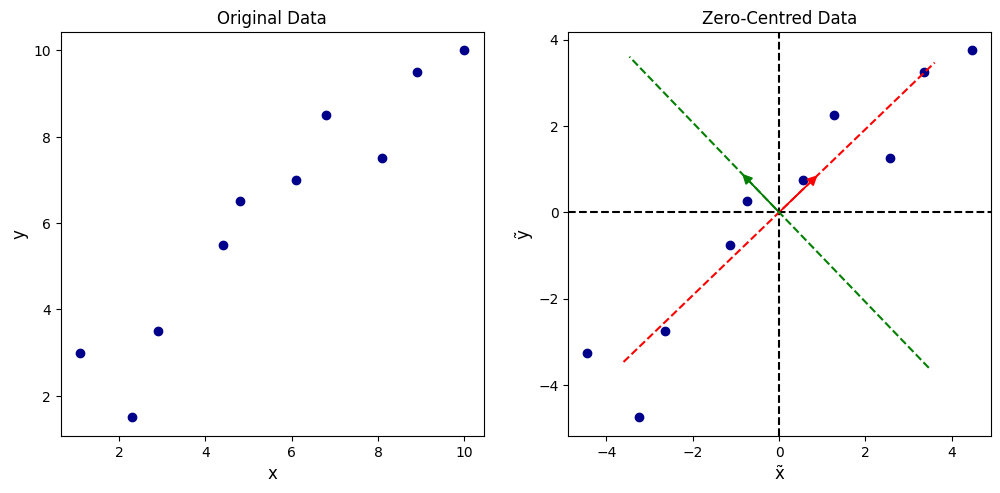

In [22]:
x, y = X[:, 0], X[:, 1]
x_tilde, y_tilde = X_tilde[:, 0], X_tilde[:, 1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1, aspect='equal')
plot_points(x, y, title = "Original Data",
            xlabel = "x", ylabel = "y")

plt.subplot(1, 2, 2, aspect='equal')
plot_points(x_tilde, y_tilde, title = "Zero-Centred Data",
            xlabel = "x\u0303", ylabel = "y\u0303")

pc1 = V[:, 0]
pc2 = V[:, 1]

plot_principal_components(pc1, "red", scale = 5)
plot_principal_components(pc2, "green", scale = 5)
plt.show()

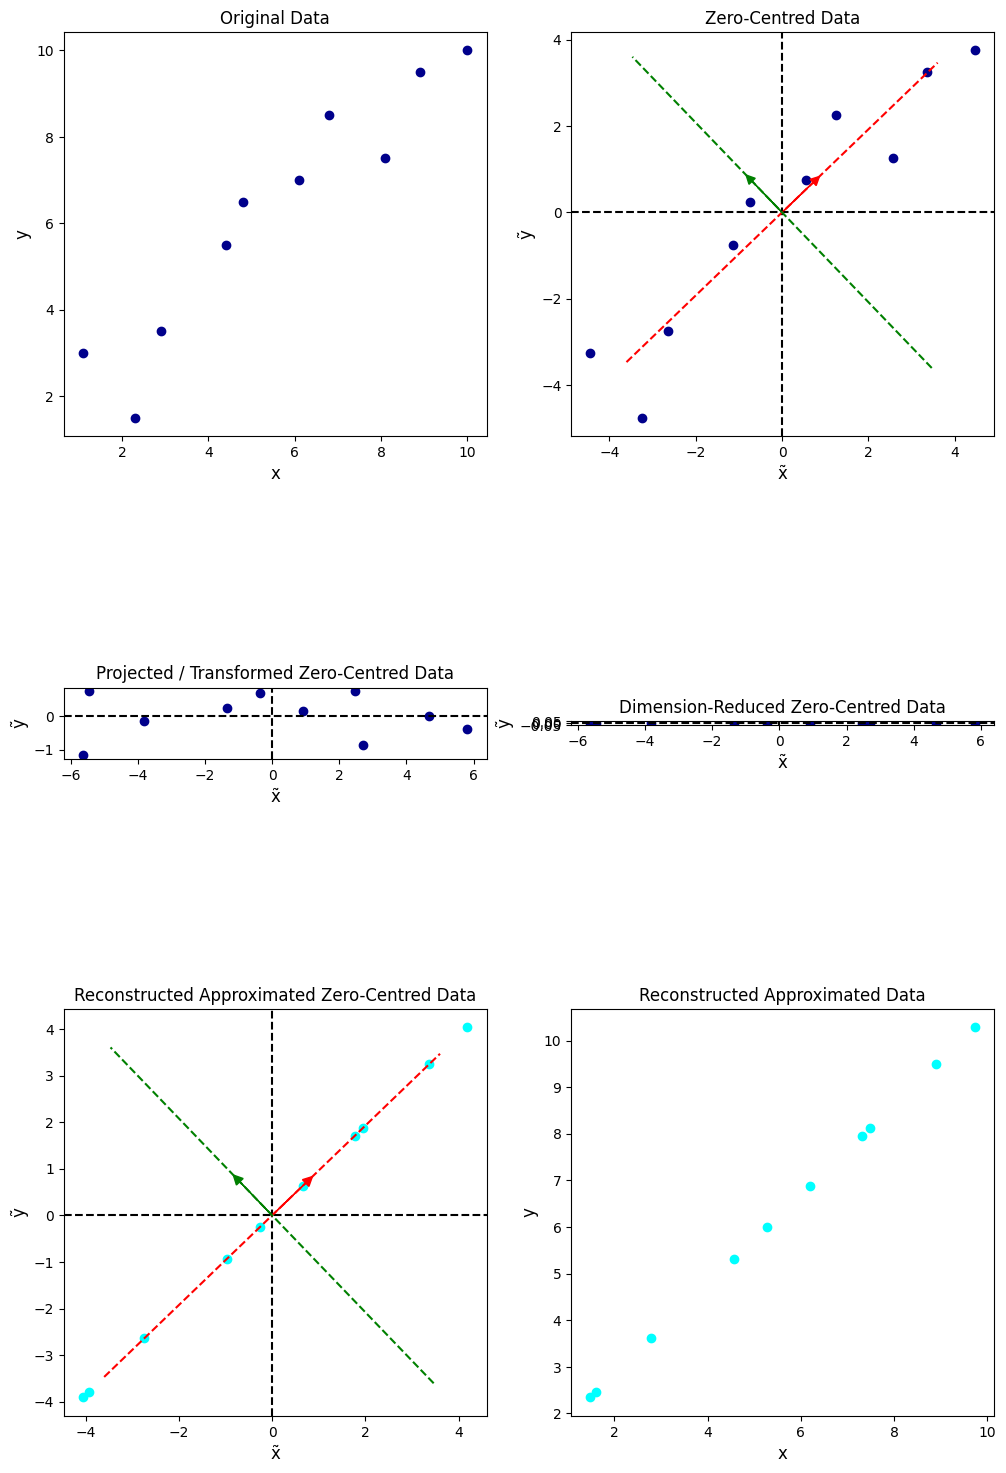

In [23]:
pc1 = V[:, 0]
pc2 = V[:, 1]

plt.figure(figsize=(12, 18))

###########################################################
plt.subplot(3, 2, 1, aspect='equal')
plot_points(X[:, 0],
            X[:, 1],
            title = "Original Data",
            xlabel = "x", ylabel = "y")

###########################################################
plt.subplot(3, 2, 2, aspect='equal')
plot_points(X_tilde[:, 0],
            X_tilde[:, 1],
            title = "Zero-Centred Data",
            xlabel = "x\u0303", ylabel = "y\u0303")

plot_principal_components(pc1, "red", scale = 5)
plot_principal_components(pc2, "green", scale = 5)

###########################################################
X_tilde_projected = np.dot(X_tilde, V)

plt.subplot(3, 2, 3, aspect='equal')
plot_points(X_tilde_projected[:, 0],
            X_tilde_projected[:, 1],
            title = "Projected / Transformed Zero-Centred Data",
            xlabel = "x\u0303", ylabel = "y\u0303")

###########################################################
X_tilde_dimension_reduced = np.copy(X_tilde_projected)
X_tilde_dimension_reduced[:, 1] = 0

plt.subplot(3, 2, 4, aspect='equal')
plot_points(X_tilde_dimension_reduced[:, 0],
            X_tilde_dimension_reduced[:, 1],
            title = "Dimension-Reduced Zero-Centred Data",
            xlabel = "x\u0303", ylabel = "y\u0303")

###########################################################
X_tilde_approximated = np.dot(X_tilde_dimension_reduced, VT)

plt.subplot(3, 2, 5, aspect='equal')
plot_points(X_tilde_approximated[:, 0],
            X_tilde_approximated[:, 1],
            title = "Reconstructed Approximated Zero-Centred Data",
            xlabel = "x\u0303", ylabel = "y\u0303", color = "cyan")
plot_principal_components(pc1, "red", scale = 5)
plot_principal_components(pc2, "green", scale = 5)

###########################################################
X_approximated = X_tilde_approximated + X_bar

plt.subplot(3, 2, 6, aspect='equal')
plot_points(X_approximated[:, 0],
            X_approximated[:, 1],
            title = "Reconstructed Approximated Data",
            xlabel = "x", ylabel = "y", color = "cyan")

plt.savefig('pca.png')
plt.show()

In [24]:
# Code to generate LaTeX output

latex1  = "\\mathbf{X} = " + array_to_latex(X) + r", \ \ \ \ "
latex1 += "\\mathbf{\widetilde{X}} = " + array_to_latex(X_tilde)
println_latex("$$" + latex1 + "$$")

latex1  = "\\mathbf{\widetilde{X}_{projected}} = " + array_to_latex(X_tilde_projected) + r", \ \ \ \ "
latex1 += "\\mathbf{\widetilde{X}_{dimension\_reduced}} = " + array_to_latex(X_tilde_dimension_reduced)
println_latex("$$" + latex1 + "$$")

latex1  = "\\mathbf{\widetilde{X}_{approximated}} = " + array_to_latex(X_tilde_approximated) + r", \ \ \ \ "
latex1 += "\\mathbf{X_{approximated}} = " + array_to_latex(X_approximated)
println_latex("$$" + latex1 + "$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### <font color='lightcyan'>Solve for the Principal Components Using `NUmPy`'s Built-in functions</font>

In [25]:
# Compute C using the NumPy's built-in function
C = np.cov(X_tilde, rowvar = False)
print(C)
print()

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# The eigenvectors are the principal components
V = eigenvectors
print("Principal Components:")
print(V)

[[8.74044444 7.98333333]
 [7.98333333 8.125     ]]

Principal Components:
[[ 0.72059593 -0.69335526]
 [ 0.69335526  0.72059593]]


### <font color='lightcyan'>Solve for the Principal Components Using `NUmPy`'s  **Singular Value Decomposition** function</font>

\begin{equation*}
\widetilde{X} = U S V^T
\end{equation*}

Documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

NOTE:
- Principal components are almost never computed directly as shown above in a computer as computing the characteristic equation for $n > 2$ is computational expensive.
- Principal components are usually computed using the **Singular Value Decomposition Method** as shown below.

In [26]:
U, sigma, VT = np.linalg.svd(X_tilde)
V = VT.T  # V is the principal components matrix

rank = sigma.shape[0]  # rank of the matrix X_tilde is the number of singular values
S = np.zeros(X_tilde.shape)
S[:rank, :rank] = np.diag(sigma)

In [27]:
# Code to generate LaTeX output

latex1 = "U = " + array_to_latex(U, precision = 6)
println_latex("$$" + latex1 + "$$")

latex1 = "sigma = " + array_to_latex(sigma)
println_latex("$$" + latex1 + "$$")

latex1 = "S = "     + array_to_latex(S)
println_latex("$$" + latex1 + "$$")

latex1 = "V^T = "   + array_to_latex(VT)
println_latex("$$" + latex1 + "$$")

latex1 = "V = "     + array_to_latex(V)
println_latex("$$" + latex1 + "$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [28]:
print("U.shape =", U.shape)
print("sigma.shape =", sigma.shape)
print("S.shape =", S.shape)
print("VT.shape =", VT.shape)
print("V.shape =", V.shape)
print()

print("type(U) =", type(U))
print("type(sigma) =", type(sigma))
print("type(S) =", type(S))
print("type(VT) =", type(VT))
print("type(V) =", type(V))

print("U =", U)
print()
print("sigma =", sigma)  # 1-D array of singular values sorted in descending order
print()
print("S =", S)  # 2-D array with diagonal values being singular values sorted in descending order
print()
print("VT =", VT)
print()
print("V =", V)
print()

U.shape = (10, 10)
sigma.shape = (2,)
S.shape = (10, 2)
VT.shape = (2, 2)
V.shape = (2, 2)

type(U) = <class 'numpy.ndarray'>
type(sigma) = <class 'numpy.ndarray'>
type(S) = <class 'numpy.ndarray'>
type(VT) = <class 'numpy.ndarray'>
type(V) = <class 'numpy.ndarray'>
U = [[-0.44852796  0.36868866 -0.22809636 -0.15955228 -0.2064004   0.0251246
  -0.02197039  0.4188899   0.32519367  0.5103643 ]
 [-0.46294885 -0.58883202 -0.23754666  0.04232519  0.27151998  0.10558951
   0.42387916 -0.23885869  0.21953089  0.10460548]
 [-0.31332015 -0.07567428  0.93555459 -0.02308643 -0.00699895  0.01547682
   0.04092004  0.04713661  0.07931157  0.09916333]
 [-0.11034566  0.12512762 -0.01097547  0.98251561 -0.03281475 -0.0025271
  -0.02207238  0.05191234  0.02125162  0.04463875]
 [-0.029604    0.34700029  0.02125997 -0.02400677  0.9285224  -0.01715244
  -0.08126226  0.08684763 -0.00809402  0.0320383 ]
 [ 0.07596725  0.07616837  0.02009052  0.00203417 -0.00986489  0.99320836
  -0.02381997  0.00202338 -0.021

## <font color='lightblue'>Perfect Reconstruction</font>

\begin{equation*}
\widetilde{X} = U S V^T
\end{equation*}


In [29]:
# X_perfect_reconstructed = np.dot( np.dot(U, S), VT )
X_reconstructed = U @ S @ VT + X_bar

print("X_reconstructed =\n", X_reconstructed)

error = X_reconstructed - X
print("error =", error)
print()
print( np.abs(error) < 0.001 )

X_reconstructed =
 [[ 1.1  3. ]
 [ 2.3  1.5]
 [ 2.9  3.5]
 [ 4.4  5.5]
 [ 4.8  6.5]
 [ 6.1  7. ]
 [ 6.8  8.5]
 [ 8.1  7.5]
 [ 8.9  9.5]
 [10.  10. ]]
error = [[ 4.4408921e-16  4.4408921e-16]
 [ 4.4408921e-16 -8.8817842e-16]
 [ 4.4408921e-16  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]]

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


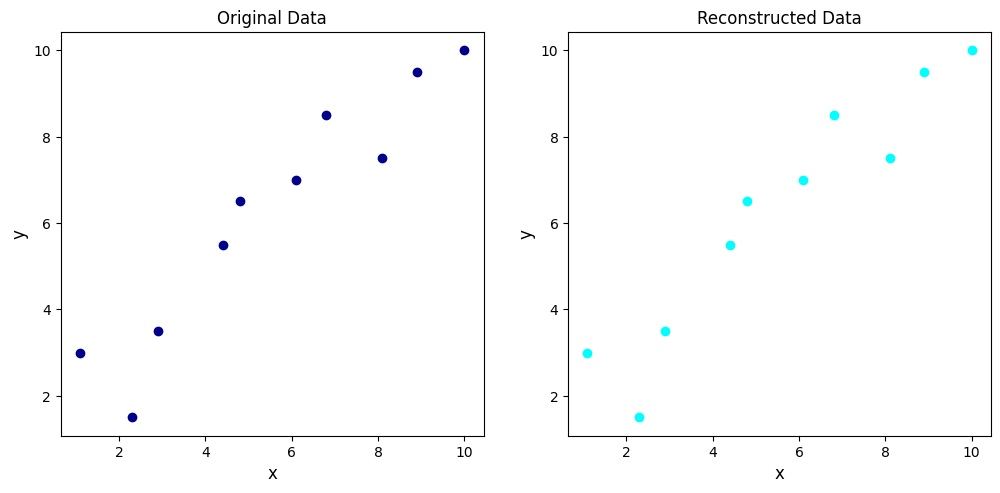

In [30]:
plt.figure(figsize=(12, 12))

###########################################################
plt.subplot(1, 2, 1, aspect='equal')
plot_points(X[:, 0],
            X[:, 1],
            title = "Original Data",
            xlabel = "x", ylabel = "y")

###########################################################
plt.subplot(1, 2, 2, aspect='equal')
plot_points(X_reconstructed[:, 0],
            X_reconstructed[:, 1],
            title = "Reconstructed Data",
            xlabel = "x", ylabel = "y", color = "cyan")

plt.show()

## <font color='lightblue'>Imperfect Reconstruction</font>

\begin{equation*}
\widetilde{X}^r = U S^r V^T
\end{equation*}


In [31]:
S_reduced = np.copy(S)
S_reduced[:, 1] = 0

# X_perfect_reconstructed = np.dot( np.dot(U, S), VT )
X_approximated = U @ S_reduced @ VT + X_bar

print("X_approximated =\n", X_approximated)

error = X_approximated - X
print("error =", error)
print()
print( np.abs(error) < 0.001 )

X_approximated =
 [[ 1.61069815  2.46923745]
 [ 1.48436487  2.34767995]
 [ 2.79517791  3.60894036]
 [ 4.57332359  5.31986684]
 [ 5.28065596  6.00045994]
 [ 6.20550648  6.89034836]
 [ 7.31843089  7.96120091]
 [ 7.49383795  8.12997706]
 [ 8.90850269  9.49116326]
 [ 9.72950151 10.28112589]]
error = [[ 0.51069815 -0.53076255]
 [-0.81563513  0.84767995]
 [-0.10482209  0.10894036]
 [ 0.17332359 -0.18013316]
 [ 0.48065596 -0.49954006]
 [ 0.10550648 -0.10965164]
 [ 0.51843089 -0.53879909]
 [-0.60616205  0.62997706]
 [ 0.00850269 -0.00883674]
 [-0.27049849  0.28112589]]

[[False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]]


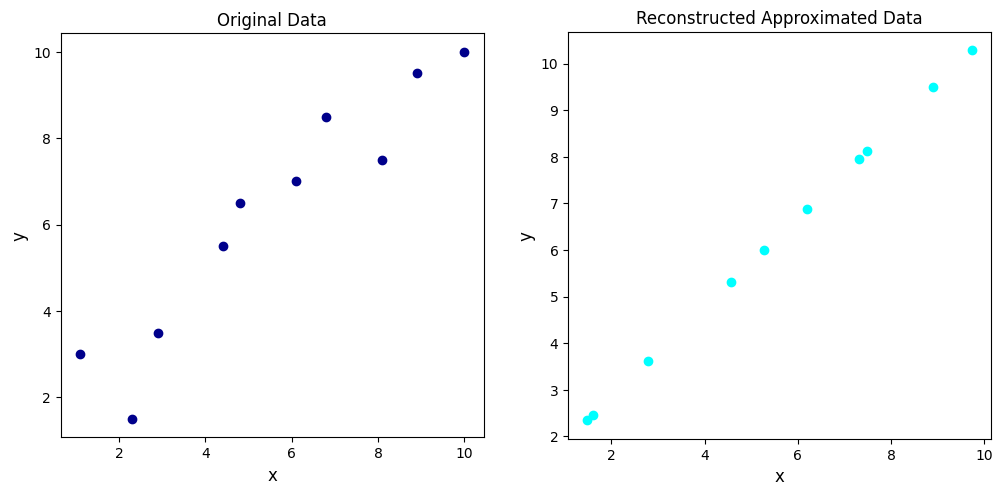

In [32]:
plt.figure(figsize=(12, 12))

###########################################################
plt.subplot(1, 2, 1, aspect='equal')
plot_points(X[:, 0],
            X[:, 1],
            title = "Original Data",
            xlabel = "x", ylabel = "y")

###########################################################
plt.subplot(1, 2, 2, aspect='equal')
plot_points(X_approximated[:, 0],
            X_approximated[:, 1],
            title = "Reconstructed Approximated Data",
            xlabel = "x", ylabel = "y", color = "cyan")

plt.show()

## <font color='lightblue'>Variance Along Principal Components</font>

- Signals along the principal components

In [33]:
sigma = np.diag(S)
print("sigma =", sigma)

variance = (sigma ** 2) / (num_points - 1)
print("variance =", variance)

print("variance ratio =", variance / np.sum(variance))

sigma = [12.15721416  1.99778473]
variance = [16.42198402  0.44346042]
variance ratio = [0.97370597 0.02629403]


### <font color='lightcyan'>Solve for the Principal Component Analysis (PCA) directly Using `scikit-learn`'s **PCA** package.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_projected = pca.fit_transform(X)
print(X_projected)
print()

principal_compoenents = pca.components_
print(principal_compoenents)
print()

variance = pca.explained_variance_
print(variance)

variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

[[-5.45285049 -0.73656058]
 [-5.62816827  1.17635962]
 [-3.8091002   0.15118092]
 [-1.3414958  -0.24997805]
 [-0.35990217 -0.69323187]
 [ 0.92355016 -0.152168  ]
 [ 2.46800019 -0.74771321]
 [ 2.71141964  0.87424455]
 [ 4.67460689 -0.0122631 ]
 [ 5.81394004  0.39012972]]

[[ 0.72059593  0.69335526]
 [ 0.69335526 -0.72059593]]

[16.42198402  0.44346042]
[0.97370597 0.02629403]


## END.